# Data Analysis on Quora Question Pairs

The original Kaggle page: https://www.kaggle.com/c/quora-question-pairs

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df['question2'] = df['question2'].astype(str)
df['question1'] = df['question1'].astype(str)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404290 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


All questions as a list:

In [4]:
# questions = pd.concat([df['question1'], df['question2']], ignore_index=True)
# questions

Concatenate each question1 and question2 pair into one string:

In [ ]:
# q_pairs = df['question1'].map(str) + df['question2']
# q_pairs

In [ ]:
# vectorizer = TfidfVectorizer(stop_words='english', min_df=4, max_df=0.8)
# q_vector = vectorizer.fit_transform(questions.values.astype('U'))
# qpair_vector = vectorizer.fit_transform(q_pairs.values.astype('U'))

Cosine distances for each pair of tf-idf:

In [5]:
vectorizer = TfidfVectorizer(stop_words='english')
def get_dis(row):
    try:
        vec = vectorizer.fit_transform([row['question1'], row['question2']])
    #     print(row['question1'])
    #     print(row['question2'])
    #     print(vectorizer.get_feature_names())
        vec = vec.todense()
        return cosine(vec[0], vec[1])
    except:
        return 1.0
df['dis'] = df.apply(get_dis, axis=1)

/Users/allegro_l/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:505: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - np.dot(u, v) / (norm(u) * norm(v))


Differences in length of each question:

In [6]:
def find_len_diff(row):
    l1 = len(row['question1'])
    l2 = len(row['question2'])
    return abs(l1 - l2) / (l1 + l2)
df['len_diff'] = df.apply(find_len_diff, axis=1)

Jaccard similarity of each pair:

In [7]:
def jaccard(row):
    s1 = set(row['question1'])
    s2 = set(row['question2'])
    return len(s1.intersection(s2)) / len(s1.union(s2))
df['jaccard'] = df.apply(jaccard, axis=1)

split the duplicate and non-duplicate groups:

In [8]:
notdup = df[df['is_duplicate']==0].dis
dup = df[df['is_duplicate']==1].dis
print(notdup.mean())
print(dup.mean())

0.6683287561231092
0.44082708964982376


In [9]:
notdup_len = df[df['is_duplicate']==0].len_diff
dup_len = df[df['is_duplicate']==1].len_diff
print(notdup_len.mean())
print(dup_len.mean())

0.17564047799791652
0.1206521092331696


In [10]:
notdup_jac = df[df['is_duplicate']==0].jaccard
dup_jac = df[df['is_duplicate']==1].jaccard
print(notdup_jac.mean())
print(dup_jac.mean())

0.7014053177416834
0.7958817731168744


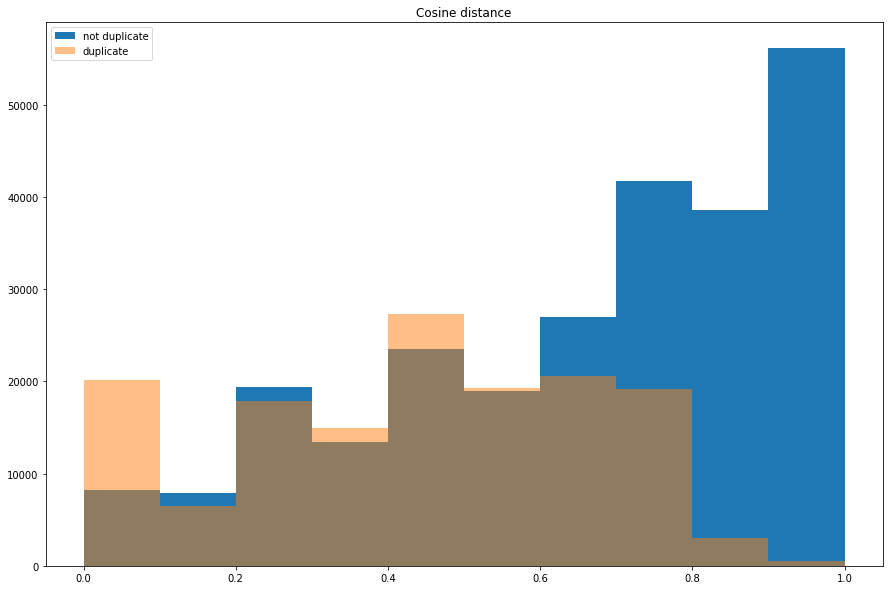

In [11]:
plt.figure(figsize=(15, 10))
plt.hist(notdup.dropna(), label='not duplicate')
plt.hist(dup.dropna(), alpha=0.5,label='duplicate')
plt.title('Cosine distance')
plt.legend()

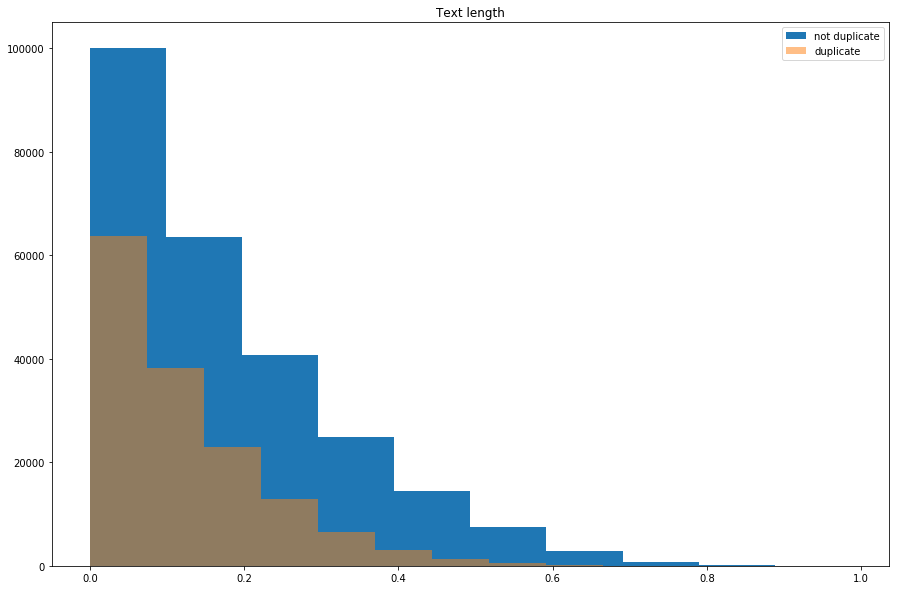

In [12]:
plt.figure(figsize=(15, 10))
plt.hist(notdup_len.dropna(), label='not duplicate')
plt.hist(dup_len.dropna(), alpha=0.5,label='duplicate')
plt.title('Text length')
plt.legend()

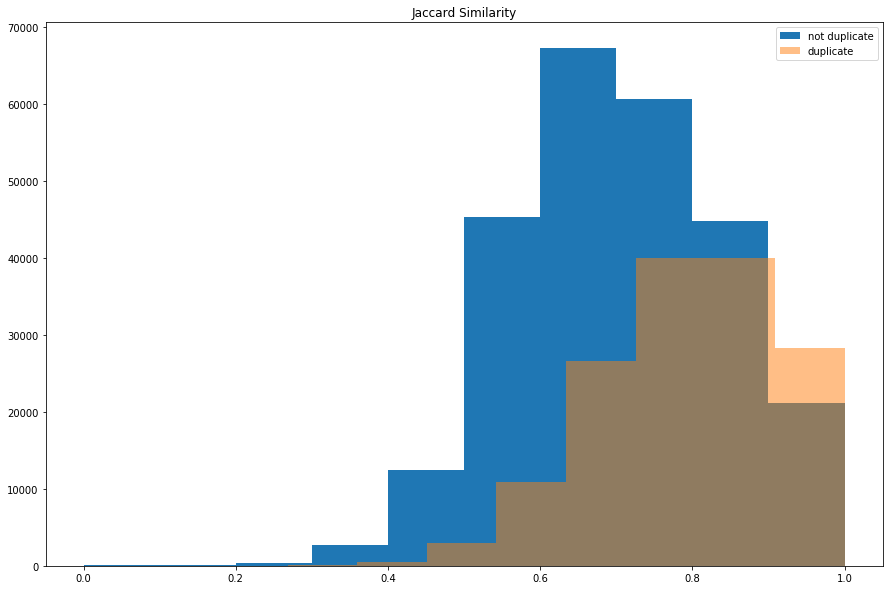

In [13]:
plt.figure(figsize=(15, 10))
plt.hist(notdup_jac.dropna(), label='not duplicate')
plt.hist(dup_jac.dropna(), alpha=0.5,label='duplicate')
plt.title('Jaccard Similarity')
plt.legend()